In [778]:
import seaborn as sns  # Nhập thư viện seaborn, thư viện này được sử dụng để tạo ra các biểu đồ thống kê đẹp mắt.
import matplotlib.pyplot as plt  # Nhập thư viện matplotlib.pyplot, một thư viện cho việc vẽ biểu đồ 2D.
%matplotlib inline
import numpy as np  # Nhập thư viện NumPy, thư viện này cung cấp các công cụ cho toán học và đại số tuyến tính.
import pandas as pd  # Nhập thư viện pandas, thư viện này dùng để xử lý và phân tích dữ liệu.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

data = 'income_evaluation.csv'
df = pd.read_csv(data)  # Đọc file CSV


In [779]:
print('Kích thước của tập dữ liệu : ', df.shape)  # In ra kích thước của DataFrame df


Kích thước của tập dữ liệu :  (32561, 15)


In [780]:
df.head()  # Hiển thị 5 dòng đầu tiên của DataFrame df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [781]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names  # Gán lại tên các cột cho DataFrame df

df.columns  # Hiển thị tên các cột hiện tại


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [782]:
df.info()  # Hiển thị thông tin chi tiết về DataFrame df, bao gồm số lượng bản ghi, loại dữ liệu của từng cột và số giá trị không null trong mỗi cột.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [783]:
df.dtypes  # Hiển thị kiểu dữ liệu của mỗi cột trong DataFrame df.


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [784]:
df.describe()  # Hiển thị các thống kê mô tả cơ bản cho các cột số trong DataFrame df.


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [785]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [786]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [787]:
df.isnull().sum()  # Kiểm tra số lượng giá trị bị thiếu (NaN) trong mỗi cột.


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [788]:
assert pd.notnull(df).all().all()  # Xác nhận rằng không có giá trị nào bị thiếu trong DataFrame.


Hàm này rất hữu ích trong giai đoạn đầu của phân tích dữ liệu, giúp người dùng có cái nhìn tổng quan về chất lượng và cấu trúc của dữ liệu trước khi tiến hành các bước phân tích sâu hơn.

In [789]:
def initial_eda(df):
    # Kiểm tra xem đầu vào có phải là DataFrame không
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()  # Tính tổng số giá trị NA trong DataFrame
        print("Kích thước : %d hàng, %d cột" % (df.shape[0], df.shape[1]))  # In ra kích thước của DataFrame
        print("Tổng số giá trị NA : %d " % (total_na))  # In ra tổng số giá trị NA
        print("%38s %10s     %10s %10s" % ("Tên cột", "Kiểu dữ liệu", "#Phân biệt", "Giá trị NA"))  # In tiêu đề cho bảng
        col_name = df.columns  # Lấy tên các cột
        dtyp = df.dtypes  # Lấy kiểu dữ liệu của từng cột
        uniq = df.nunique()  # Tính số giá trị phân biệt trong mỗi cột
        na_val = df.isna().sum()  # Tính số giá trị NA trong mỗi cột

        # Lặp qua từng cột và in thông tin
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        # Nếu đầu vào không phải DataFrame, in thông báo lỗi
        print("Mong đợi một DataFrame nhưng nhận được %15s" % (type(df)))


In [790]:
initial_eda(df)

Kích thước : 32561 hàng, 15 cột
Tổng số giá trị NA : 0 
                               Tên cột Kiểu dữ liệu     #Phân biệt Giá trị NA
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64   

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11296\1159414504.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


In [791]:
categorical = [var for var in df.columns if df[var].dtype=='O']  # Tìm các biến phân loại (kiểu dữ liệu 'O' đại diện cho chuỗi)

# In ra số lượng các biến phân loại
print('Có {} biến phân loại\n'.format(len(categorical)))

# In ra danh sách các biến phân loại
print('Các biến phân loại là:\n\n', categorical)


Có 9 biến phân loại

Các biến phân loại là:

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [792]:
df[categorical].head()  # Hiển thị 5 dòng đầu tiên của các biến phân loại trong DataFrame


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [793]:
for var in categorical:
    print(df[var].value_counts(), '\n')  # In kết quả đếm các giá trị của mỗi biến phân loại, cách nhau bằng dòng trống


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64 

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64 

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial

In [794]:
for var in categorical:
    print(df[var].value_counts() / float(len(df)), '\n')  # In tỉ lệ phần trăm các giá trị của mỗi biến phân loại



workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64 

education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64 

marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: 

In [795]:
# Loại bỏ khoảng trắng thừa trước/sau tên cột
df.columns = df.columns.str.strip()


# Sau đó bạn có thể chạy lại đoạn mã mà không gặp lỗi KeyError
print(df['income'].value_counts())


income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [796]:
df['income'].value_counts()  # Đếm số lượng xuất hiện của từng giá trị trong cột 'income'


income
<=50K    24720
>50K      7841
Name: count, dtype: int64

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11296\3199106879.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="income", data=df, palette="Set1")


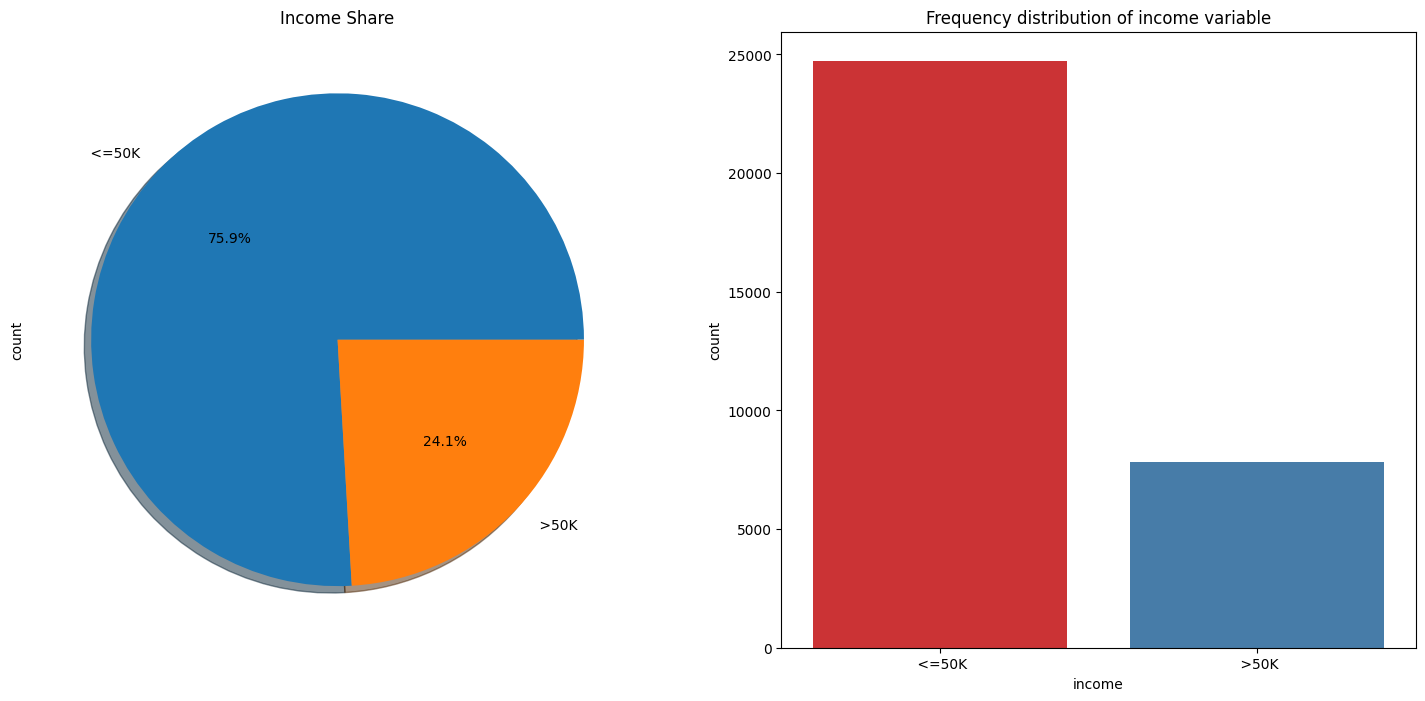

In [797]:
# visualize frequency distribution of income variable

f, ax = plt.subplots(1, 2, figsize=(18, 8))  # Tạo một lưới con gồm 1 hàng và 2 cột với kích thước 18x8 inch

# Biểu đồ hình tròn thể hiện tỉ lệ các giá trị trong cột 'income'
ax[0] = df['income'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Income Share')  # Đặt tiêu đề cho biểu đồ hình tròn

# Biểu đồ cột thể hiện phân phối tần suất của biến 'income'
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")  # Đặt tiêu đề cho biểu đồ cột

plt.show()  # Hiển thị các biểu đồ


C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11296\992068436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="income", data=df, palette="Set1")  # Tạo biểu đồ cột cho biến 'income' theo chiều ngang


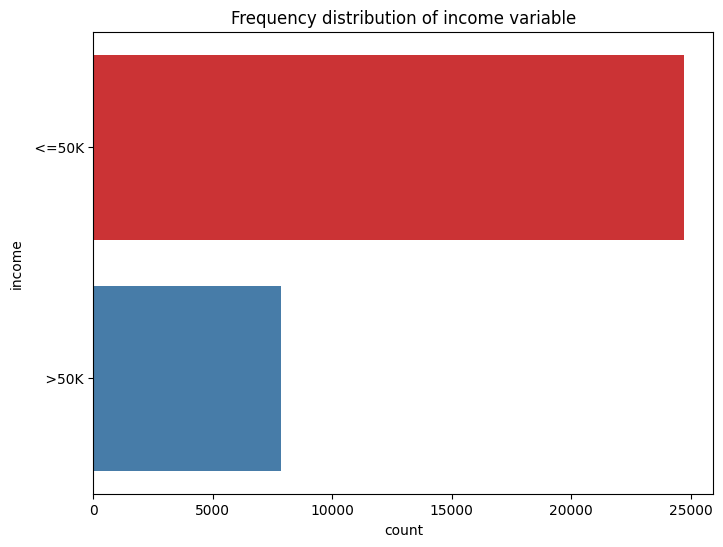

In [798]:
f, ax = plt.subplots(figsize=(8, 6))  # Tạo một lưới con với kích thước 8x6 inch
ax = sns.countplot(y="income", data=df, palette="Set1")  # Tạo biểu đồ cột cho biến 'income' theo chiều ngang
ax.set_title("Frequency distribution of income variable")  # Đặt tiêu đề cho biểu đồ
plt.show()  # Hiển thị biểu đồ


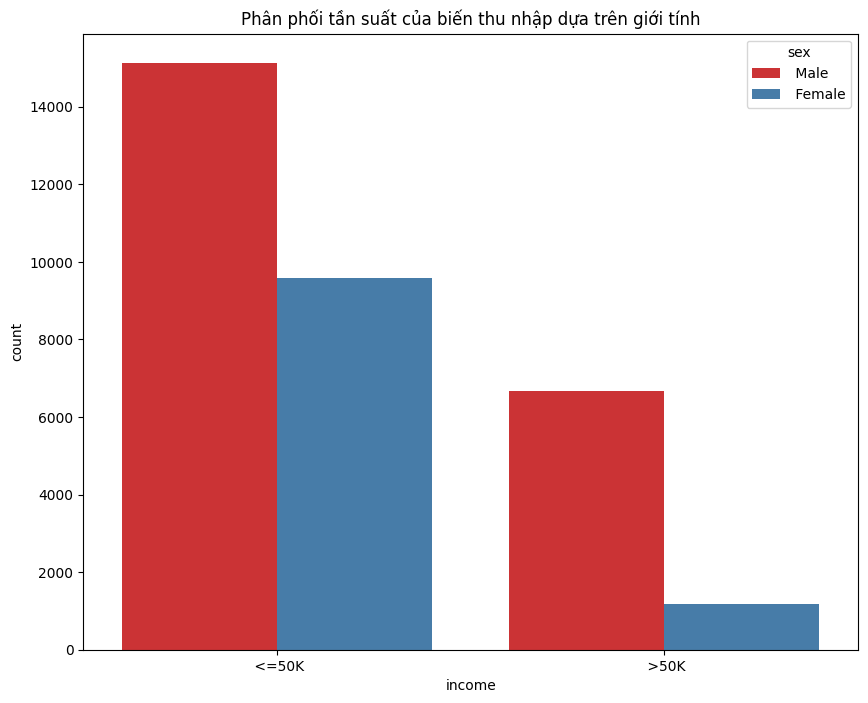

In [799]:
f, ax = plt.subplots(figsize=(10, 8))  # Tạo một lưới con với kích thước 10x8 inch
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")  # Tạo biểu đồ cột cho biến 'income', phân tách theo giới tính ('sex')
ax.set_title("Phân phối tần suất của biến thu nhập dựa trên giới tính")  # Đặt tiêu đề cho biểu đồ (dịch tiêu đề sang tiếng Việt)
plt.show()  # Hiển thị biểu đồ


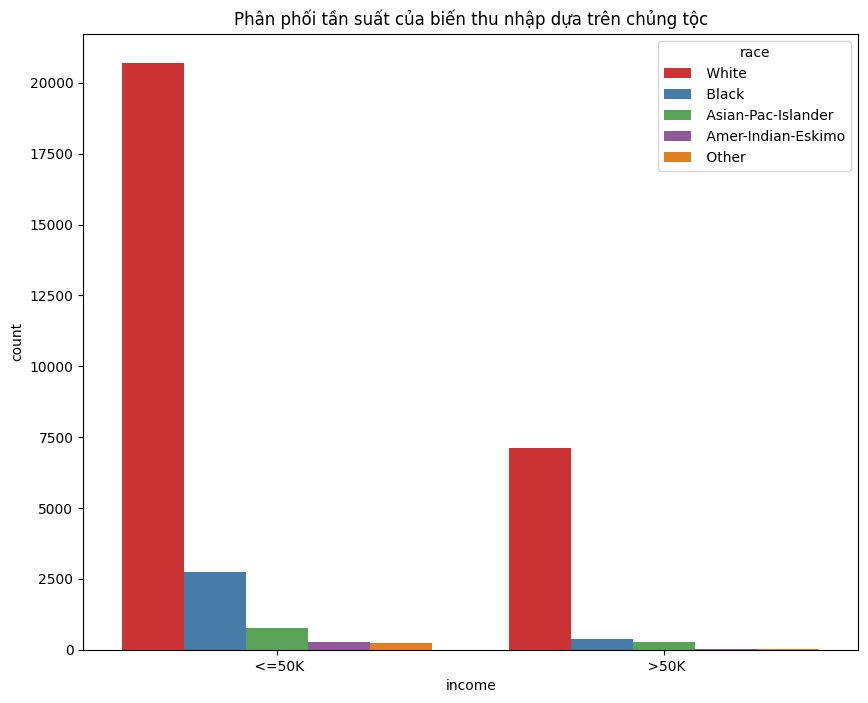

In [800]:
f, ax = plt.subplots(figsize=(10, 8))  # Tạo một lưới con với kích thước 10x8 inch
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")  # Tạo biểu đồ cột cho biến 'income', phân tách theo chủng tộc ('race')
ax.set_title("Phân phối tần suất của biến thu nhập dựa trên chủng tộc")  # Đặt tiêu đề cho biểu đồ (dịch tiêu đề sang tiếng Việt)
plt.show()  # Hiển thị biểu đồ


In [801]:
df.workclass.unique()  # Lấy và in ra các giá trị duy nhất (distinct) trong cột 'workclass' của DataFrame 'df'


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [802]:
df.workclass.value_counts()  # Đếm số lần xuất hiện của mỗi giá trị trong cột 'workclass' và in ra số lượng tương ứng


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [803]:
df.workclass.value_counts()  # Đếm số lượng các giá trị khác nhau trong cột 'workclass' sau khi đã thay thế các giá trị '?' bằng NaN.


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Diễn giải: chúng ta có thể thấy nhiều nhà Tư nhân hơn so với các nhà lao độn khác

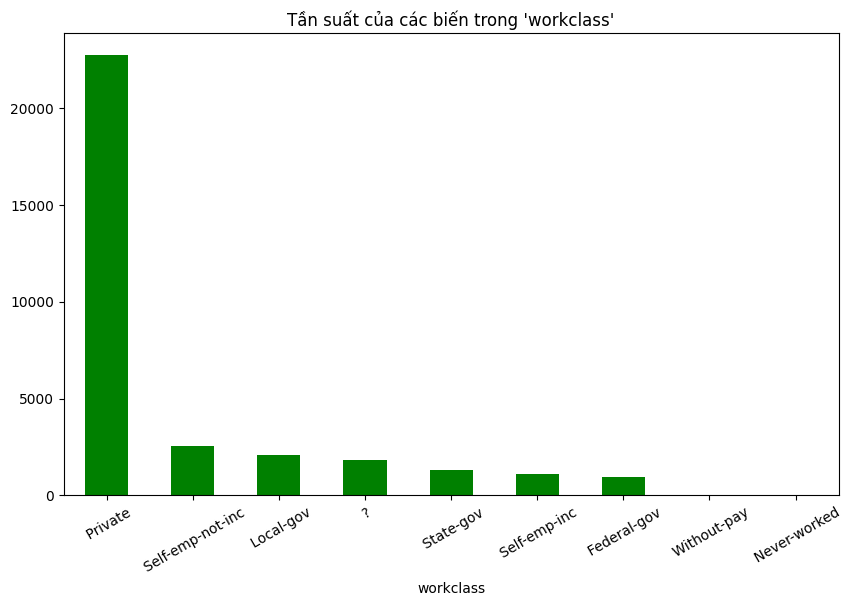

In [804]:
f, ax = plt.subplots(figsize=(10, 6))  # Tạo một khung hình có kích thước 10x6
ax = df.workclass.value_counts().plot(kind="bar", color="green")  # Vẽ biểu đồ thanh cho tần suất của các giá trị trong cột 'workclass' với màu xanh lá
ax.set_title("Tần suất của các biến trong 'workclass'")  # Đặt tiêu đề cho biểu đồ
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)  # Gắn nhãn cho các thanh trong biểu đồ và xoay nhãn 30 độ
plt.show()  # Hiển thị biểu đồ


Giải thích :Chúng ta có thể thấy rằng người lao động kiếm được ít hơn 50 nghìn ở hầu hết các hạng mục công việc.
 Nhưng xu hướng này hấp dẫn hơn ở hạng mục Lớp học riêng tư.

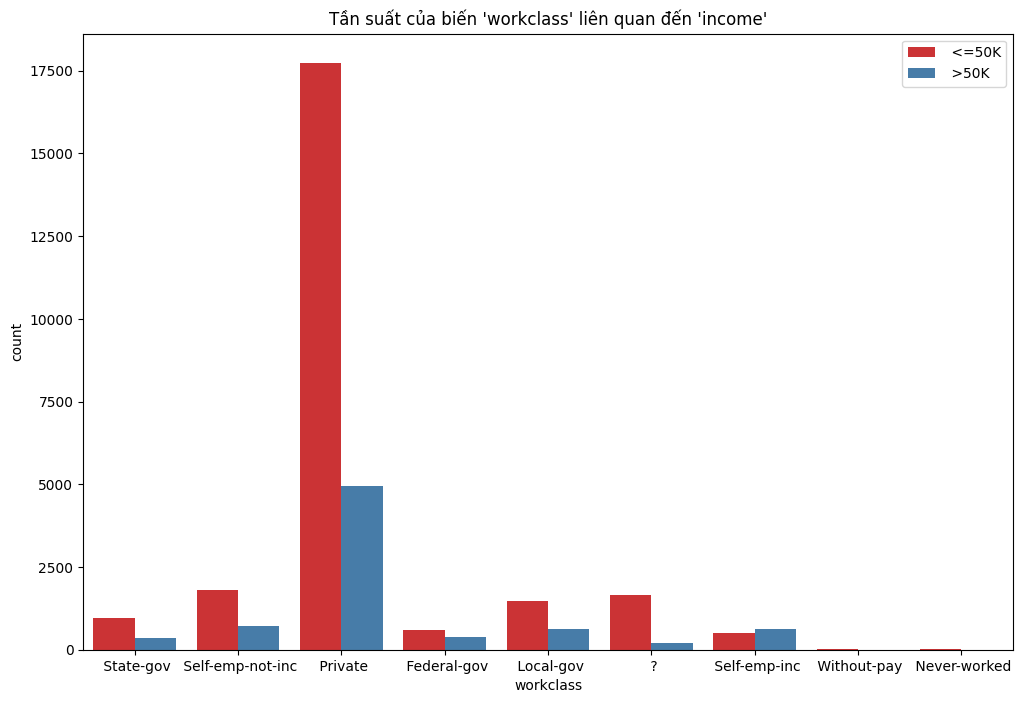

In [805]:
f, ax = plt.subplots(figsize=(12, 8))  # Tạo một khung hình có kích thước 12x8
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")  # Vẽ biểu đồ cột cho tần suất của các giá trị trong cột 'workclass', phân chia theo cột 'income'
ax.set_title("Tần suất của biến 'workclass' liên quan đến 'income'")  # Đặt tiêu đề cho biểu đồ
ax.legend(loc='upper right')  # Đặt vị trí của chú thích ở góc trên bên phải
plt.show()  # Hiển thị biểu đồ


In [806]:
# Kiểm tra số lượng nhãn duy nhất trong cột 'occupation'
df.occupation.nunique()  # Trả về số lượng các giá trị khác nhau trong cột 'occupation'


15

In [807]:
# Xem các nhãn duy nhất trong cột 'occupation'
df.occupation.unique()  # Trả về một mảng chứa tất cả các giá trị khác nhau trong cột 'occupation'


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11296\1146972775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="occupation", data=df, palette="Set1")  # Sử dụng seaborn để tạo biểu đồ cột cho biến 'occupation'
C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11296\1146972775.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)  # Đặt nhãn cho trục x với các giá trị trong cột 'occupation' và xoay 30 độ


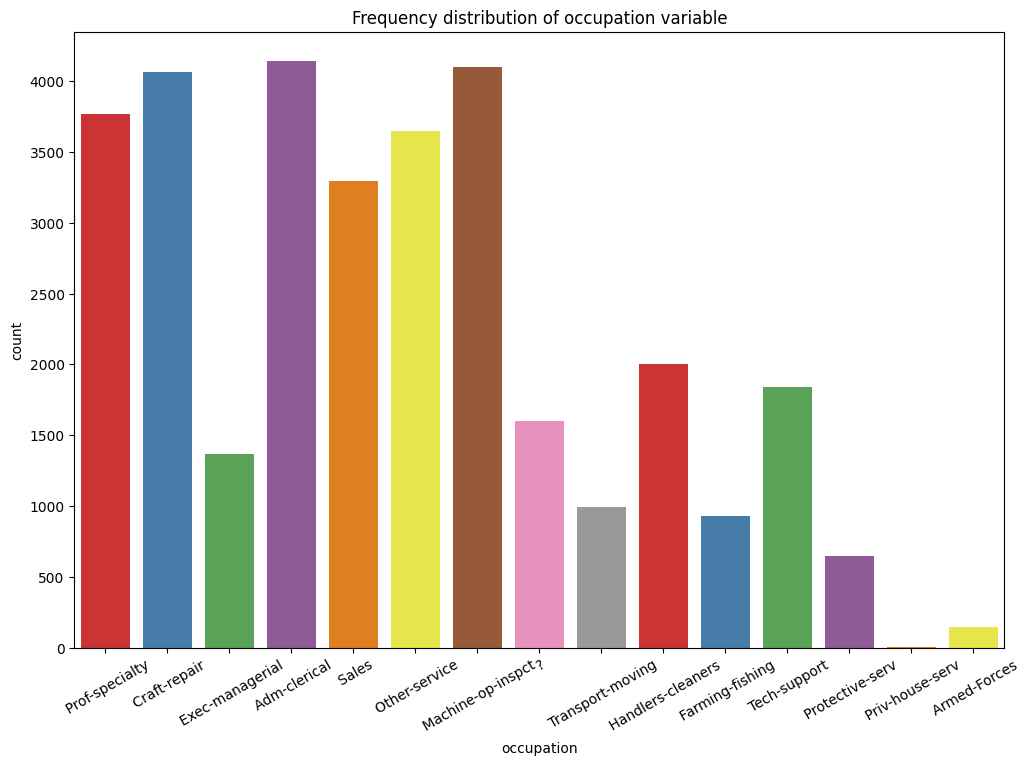

In [808]:
# Hình ảnh hóa phân phối tần suất của biến `occupation`
f, ax = plt.subplots(figsize=(12, 8))  # Tạo một hình vẽ với kích thước 12x8 inch
ax = sns.countplot(x="occupation", data=df, palette="Set1")  # Sử dụng seaborn để tạo biểu đồ cột cho biến 'occupation'
ax.set_title("Frequency distribution of occupation variable")  # Thiết lập tiêu đề cho biểu đồ
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)  # Đặt nhãn cho trục x với các giá trị trong cột 'occupation' và xoay 30 độ
plt.show()  # Hiển thị biểu đồ


In [809]:
# Tạo danh sách các biến số học trong DataFrame
numerical = [var for var in df.columns if df[var].dtype != 'O']  # Lọc ra các cột không phải là kiểu 'object'

# In ra số lượng các biến số học
print('Có {} biến số học\n'.format(len(numerical)))  # Sử dụng định dạng để hiển thị số lượng biến

# In ra danh sách các biến số học
print('Các biến số học là:\n\n', numerical)  # Hiển thị tên của các biến số học


Có 6 biến số học

Các biến số học là:

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [810]:
# Hiển thị 5 dòng đầu tiên của các cột biến số học
df[numerical].head()  # Lấy các cột thuộc dạng số học và hiển thị 5 dòng đầu tiên


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11296\489866865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10, color='blue')  # Vẽ biểu đồ phân phối với 10 cột, màu xanh


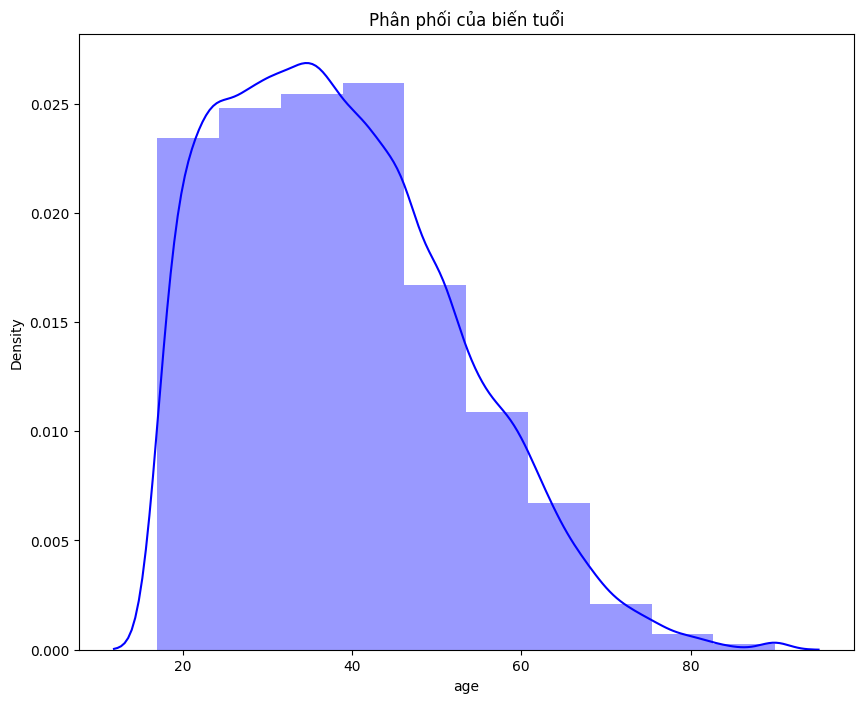

In [811]:
# Tạo biểu đồ phân phối của biến 'age' với các giá trị được chia thành 10 khoảng
f, ax = plt.subplots(figsize=(10,8))  # Tạo biểu đồ với kích thước 10x8
x = df['age']  # Lấy dữ liệu từ cột 'age'
ax = sns.distplot(x, bins=10, color='blue')  # Vẽ biểu đồ phân phối với 10 cột, màu xanh
ax.set_title("Phân phối của biến tuổi")  # Đặt tiêu đề cho biểu đồ
plt.show()  # Hiển thị biểu đồ


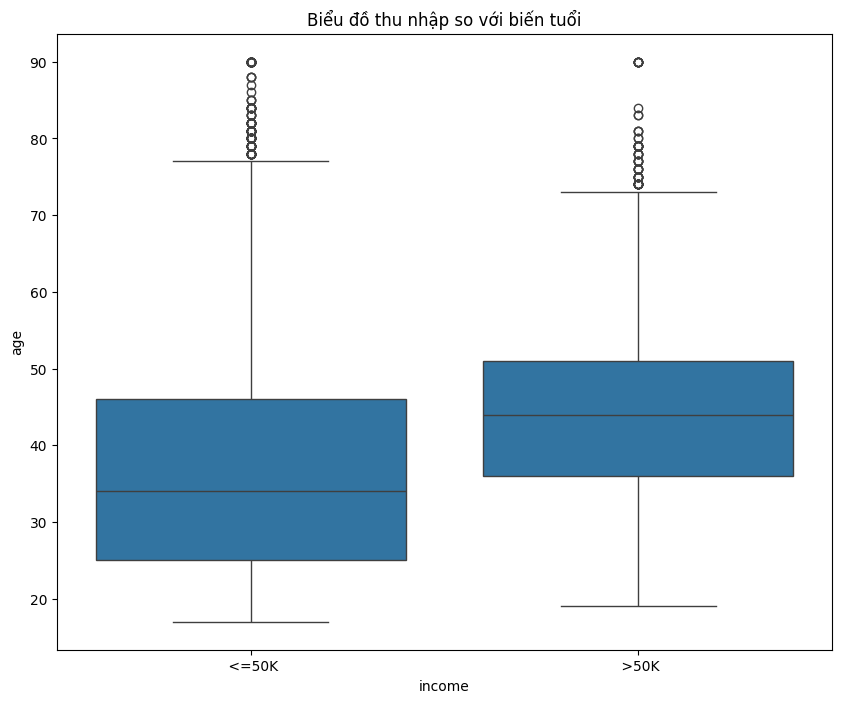

In [812]:
# Tạo biểu đồ hộp (boxplot) để hình dung mối quan hệ giữa 'income' và 'age'
f, ax = plt.subplots(figsize=(10, 8))  # Tạo biểu đồ với kích thước 10x8
ax = sns.boxplot(x="income", y="age", data=df)  # Vẽ biểu đồ hộp với trục x là 'income' và trục y là 'age'
ax.set_title("Biểu đồ thu nhập so với biến tuổi")  # Đặt tiêu đề cho biểu đồ
plt.show()  # Hiển thị biểu đồ


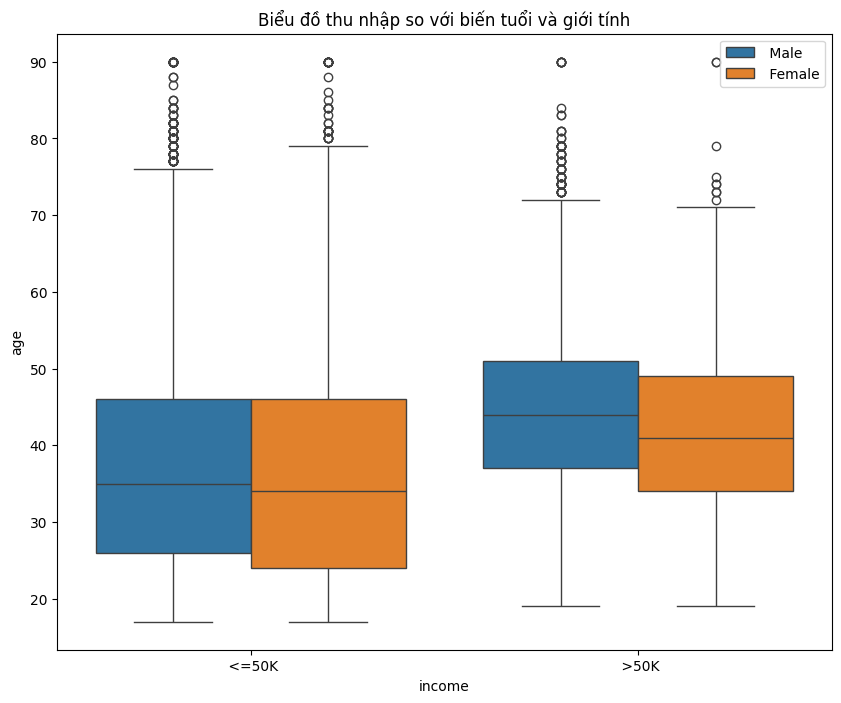

In [813]:
# Tạo biểu đồ hộp (boxplot) để hình dung mối quan hệ giữa 'income', 'age' và 'sex'
f, ax = plt.subplots(figsize=(10, 8))  # Tạo biểu đồ với kích thước 10x8
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)  # Vẽ biểu đồ hộp với trục x là 'income', trục y là 'age' và phân loại theo 'sex'
ax.set_title("Biểu đồ thu nhập so với biến tuổi và giới tính")  # Đặt tiêu đề cho biểu đồ
ax.legend(loc='upper right')  # Đặt vị trí cho chú giải (legend)
plt.show()  # Hiển thị biểu đồ


<Figure size 800x600 with 0 Axes>

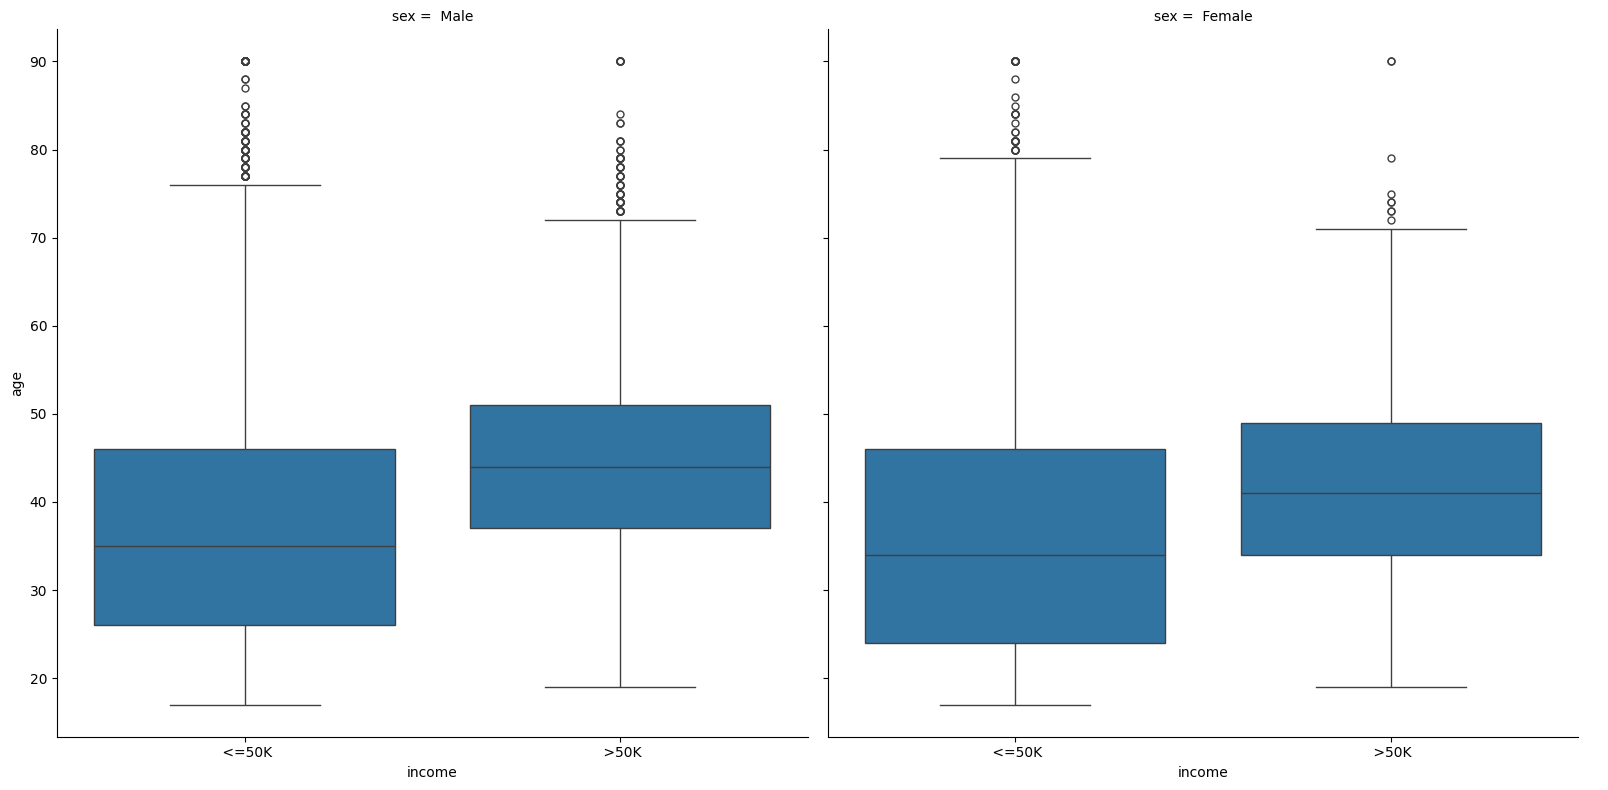

In [814]:
# Tạo biểu đồ hộp (boxplot) phân loại theo giới tính để so sánh độ tuổi (age) với thu nhập (income)
plt.figure(figsize=(8, 6))  # Thiết lập kích thước cho biểu đồ
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
# Vẽ biểu đồ hộp với trục x là 'income', trục y là 'age', phân loại theo 'sex', với chiều cao 8 và tỷ lệ 1
plt.show()  # Hiển thị biểu đồ


In [815]:
# Xử lý giá trị '?' thành NaN
df.replace(' ?', np.nan, inplace=True)

# Xóa các hàng có giá trị NaN
df.dropna(inplace=True)

In [816]:
# Tách dữ liệu
X = df.drop(['income'], axis=1)
y = df['income']

In [817]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện (X_train, y_train) và tập kiểm tra (X_test, y_test) với tỷ lệ 70% cho huấn luyện và 30% cho kiểm tra.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [818]:
# Tạo danh sách các biến phân loại (categorical) bằng cách kiểm tra kiểu dữ liệu của các cột trong tập huấn luyện X_train.

# Phát hiện các biến phân loại
categorical = [col for col in X_train.columns if X_train[col].dtype == 'O']
# Hiển thị danh sách các biến phân loại.
categorical


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [819]:
# Kiểm tra kích thước (số hàng, số cột) của tập huấn luyện và tập kiểm tra
X_train.shape, X_test.shape


((21113, 14), (9049, 14))

In [820]:
# Sử dụng OneHotEncoder để mã hóa biến phân loại
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical])
X_test_encoded = encoder.transform(X_test[categorical])

In [821]:

# Chuyển đổi lại thành DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical))

# Kết hợp lại với các biến số liệu
X_train = pd.concat([X_train.drop(categorical, axis=1).reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical, axis=1).reset_index(drop=True), X_test_encoded], axis=1)

In [822]:
X_train_encoded.head()

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [823]:
X_test_encoded.head()

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [824]:
X_test

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,44,81853,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21,306114,10,0,0,20,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,36,186110,10,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30,45427,11,0,0,49,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42,133584,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,27,218785,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9045,54,36327,4,0,0,50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9046,53,149650,9,0,2559,48,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9047,18,177722,9,0,0,20,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [825]:
X_test.shape

(9049, 96)

In [826]:
# Chuẩn hóa dữ liệu
numerical = [var for var in X_train.columns if X_train[var].dtype in [np.int64, np.float64]]
scaler = RobustScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

SỬ DỤNG MÔ HÌNH RAMDOM FORET

In [827]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo bộ phân loại Random Forest với giá trị random_state là 0 để tái tạo kết quả
rfc = RandomForestClassifier(random_state=0)

# Huấn luyện mô hình với tập dữ liệu huấn luyện X_train và y_train
rfc.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra X_test
y_pred = rfc.predict(X_test)

# Nhập accuracy_score từ thư viện sklearn.metrics để tính điểm độ chính xác
from sklearn.metrics import accuracy_score

# In ra điểm độ chính xác của mô hình
print('Điểm độ chính xác của mô hình với 10 cây quyết định là: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Điểm độ chính xác của mô hình với 10 cây quyết định là: 0.8431


In [828]:
# Khởi tạo bộ phân loại Random Forest với 100 cây quyết định và giá trị random_state là 0
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Huấn luyện mô hình với tập dữ liệu huấn luyện X_train và y_train
rfc_100.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra X_test
y_pred_100 = rfc_100.predict(X_test)

# In ra điểm độ chính xác của mô hình với 100 cây quyết định
print('Điểm độ chính xác của mô hình với 100 cây quyết định là: {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))


Điểm độ chính xác của mô hình với 100 cây quyết định là: 0.8431


In [829]:
# In ra ma trận nhầm lẫn và cắt nó thành bốn phần

from sklearn.metrics import confusion_matrix

# Tính toán ma trận nhầm lẫn giữa giá trị thực tế y_test và giá trị dự đoán y_pred
cm = confusion_matrix(y_test, y_pred)

# In ra ma trận nhầm lẫn
print('Ma trận nhầm lẫn\n\n', cm)


Ma trận nhầm lẫn

 [[6222  542]
 [ 878 1407]]


<Axes: >

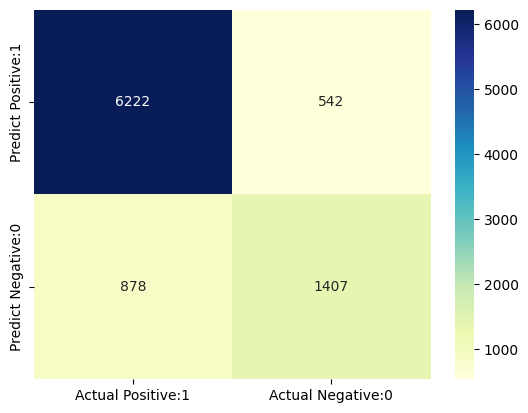

In [830]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [831]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Giả sử bạn đã có X_train và y_train

# Huấn luyện mô hình
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Lưu mô hình
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Lưu tên các cột đã được mã hóa
encoded_columns = X_train.columns.tolist()
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(encoded_columns, file)

In [832]:
import pickle

# Lưu mô hình vào file 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(rfc, file)  # Sử dụng mô hình đã huấn luyện (ví dụ: dtr)


In [833]:
import pickle

# Lưu mô hình vào file 'model.pkl'
with open('model1.pkl', 'wb') as file:
    pickle.dump(rfc_100, file)  # Sử dụng mô hình đã huấn luyện (ví dụ: dtr)